In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
df = pd.read_csv("../../MBB.csv")
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df.head()

,Price
0,10696.2
1,10595.5
2,10615.6
3,10535.0
4,11058.8


In [3]:

# Split the data into training, testing sets by 8:2
length = len(df)
train_size = int(0.8 * length)
test_size =length - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
#3. Set up training process 
from pmdarima.arima import auto_arima 
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17372.755, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17376.620, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17378.535, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17378.533, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17374.922, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17382.236, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17382.595, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17373.148, Time=0.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=17373.198, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17380.509, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17381.999, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17382.646, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=17375.058, Time=1.68 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=17374.184, Time=0.34 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [5]:
# 4.make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# 5.Caculate the  some metrics
# calculate the RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# calculate the MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Testing MAPE:", test_mape)

# calculate the MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:", test_mae)

Testing RMSE: 1040.3289088053932
Testing MAPE: 4.4458529316992585
Testing MAE: 802.0822780209893


In [7]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[17310.43885778 17303.32322607 17379.20121086 17483.92521536
 17550.40390779 17544.21344808 17482.61132489 17417.40561365
 17396.9922956  17434.8772519  17504.68082331 17561.95666628
 17575.4678089  17546.27506257 17503.43267204 17481.73652959
 17498.17706887 17542.74246597 17588.02417932 17609.20225858
 17600.0952469  17575.14844771 17557.62165423 17563.29315068
 17590.90820813 17624.90679128 17647.26386933 17649.63046704
 17637.74945253 17626.10167795]


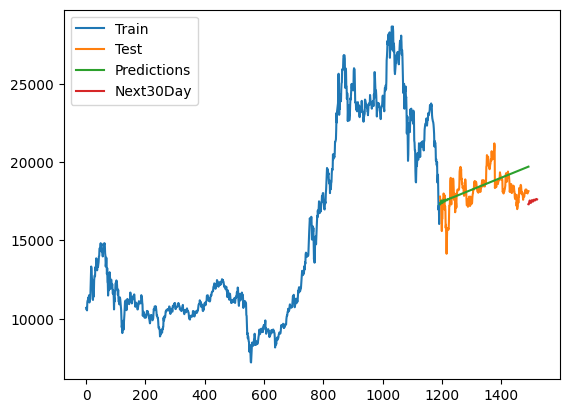

In [8]:
# 7.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()